In [1]:
##Wrangling the Billboard Top 100
#Part A 
import pandas as pd

# Load your data
df = pd.read_csv('billboard.csv')

In [2]:
# Group by performer and song and count the number of weeks
popular_songs = df.groupby(['performer', 'song']).size().reset_index(name='count')

# Sort by count in descending order and select the top 10
top_10_songs = popular_songs.sort_values('count', ascending=False).head(10)


In [3]:
print(top_10_songs)


                                       performer  \
11194                            Imagine Dragons   
403                                   AWOLNATION   
27121                                 The Weeknd   
12026                                 Jason Mraz   
15008                                LeAnn Rimes   
18752                                OneRepublic   
14807  LMFAO Featuring Lauren Bennett & GoonRock   
12421                                      Jewel   
506                                        Adele   
4347                            Carrie Underwood   

                                      song  count  
11194                          Radioactive     87  
403                                   Sail     79  
27121                      Blinding Lights     76  
12026                            I'm Yours     76  
15008                        How Do I Live     69  
18752                       Counting Stars     68  
14807                    Party Rock Anthem     68  
12421  Fool

In [4]:
#Part B
unique_songs_per_year = df.groupby('year')['song'].nunique().reset_index(name='unique_songs')
unique_songs_per_year = unique_songs_per_year[(unique_songs_per_year['year'] > 1958) & (unique_songs_per_year['year'] < 2021)]


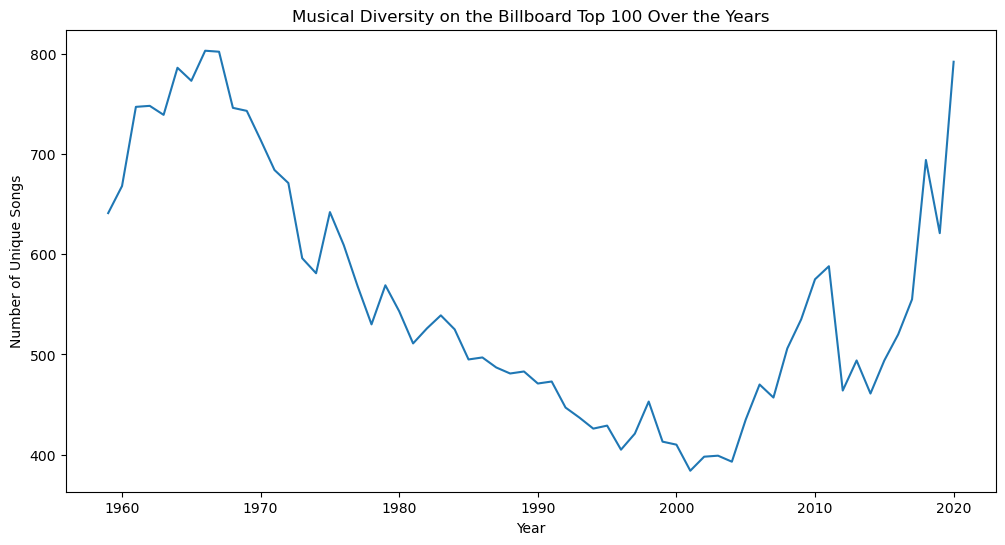

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(unique_songs_per_year['year'], unique_songs_per_year['unique_songs'])
plt.title('Musical Diversity on the Billboard Top 100 Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Unique Songs')
plt.show()


In [6]:
#Part C
ten_week_hits = df.groupby(['performer', 'song']).filter(lambda x: len(x) >= 10)

artist_hits = ten_week_hits.groupby('performer')['song'].nunique().reset_index(name='hits')
top_artists = artist_hits[artist_hits['hits'] >= 30]


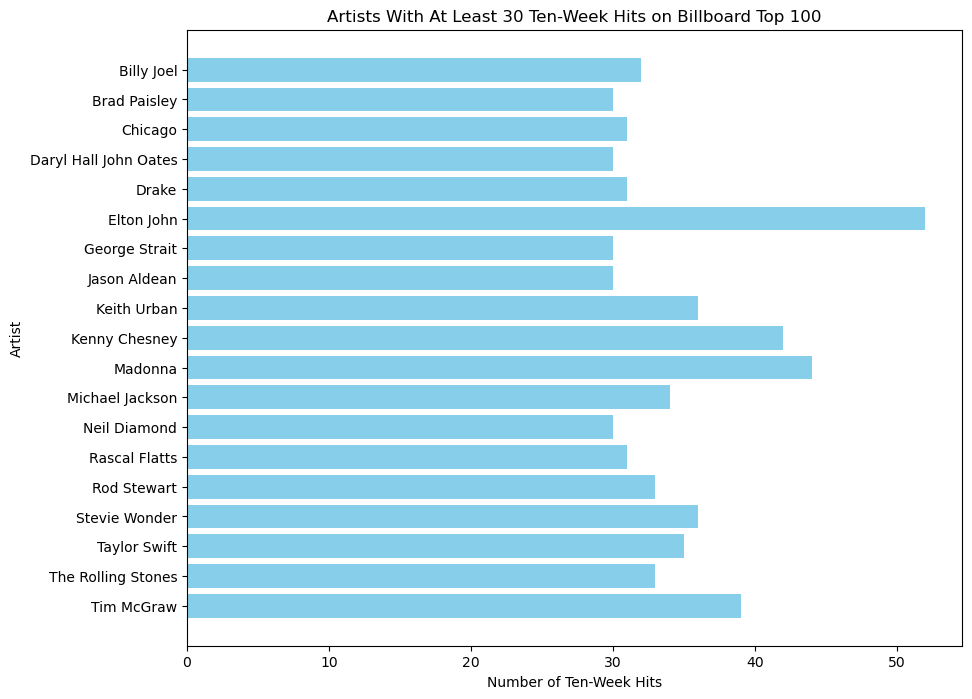

In [7]:
plt.figure(figsize=(10,8))
plt.barh(top_artists['performer'], top_artists['hits'], color='skyblue')
plt.xlabel('Number of Ten-Week Hits')
plt.ylabel('Artist')
plt.title('Artists With At Least 30 Ten-Week Hits on Billboard Top 100')
plt.gca().invert_yaxis()  # Inverts the y-axis so the artist with the most hits is on top
plt.show()


In [ ]:
##Visual story telling part 1: green buildings

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
file_path = 'greenbuildings.csv'
df = pd.read_csv(file_path)

# Print the first 5 rows to check the data
print(df.head())

   CS_PropertyID  cluster    size  empl_gr   Rent  leasing_rate  stories  age  \
0         379105        1  260300     2.22  38.56         91.39       14   16   
1         122151        1   67861     2.22  28.57         87.14        5   27   
2         379839        1  164848     2.22  33.31         88.94       13   36   
3          94614        1   93372     2.22  35.00         97.04       13   46   
4         379285        1  174307     2.22  40.69         96.58       16    5   

   renovated  class_a  ...  green_rating  net  amenities  cd_total_07  \
0          0        1  ...             1    0          1         4988   
1          0        0  ...             0    0          1         4988   
2          1        0  ...             0    0          1         4988   
3          1        0  ...             0    0          0         4988   
4          0        1  ...             0    0          1         4988   

   hd_total07  total_dd_07  Precipitation  Gas_Costs  Electricity_Costs  \

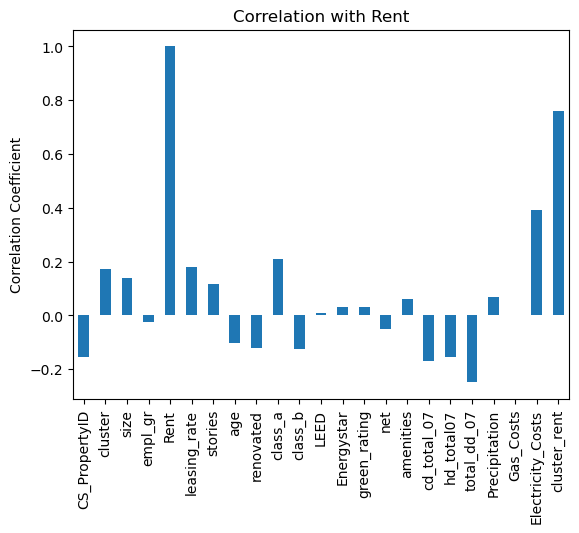

In [36]:
correlations = df.corrwith(df['Rent'])

# Plot the correlations
correlations.plot(kind='bar')
plt.title('Correlation with Rent')
plt.ylabel('Correlation Coefficient')
plt.show()


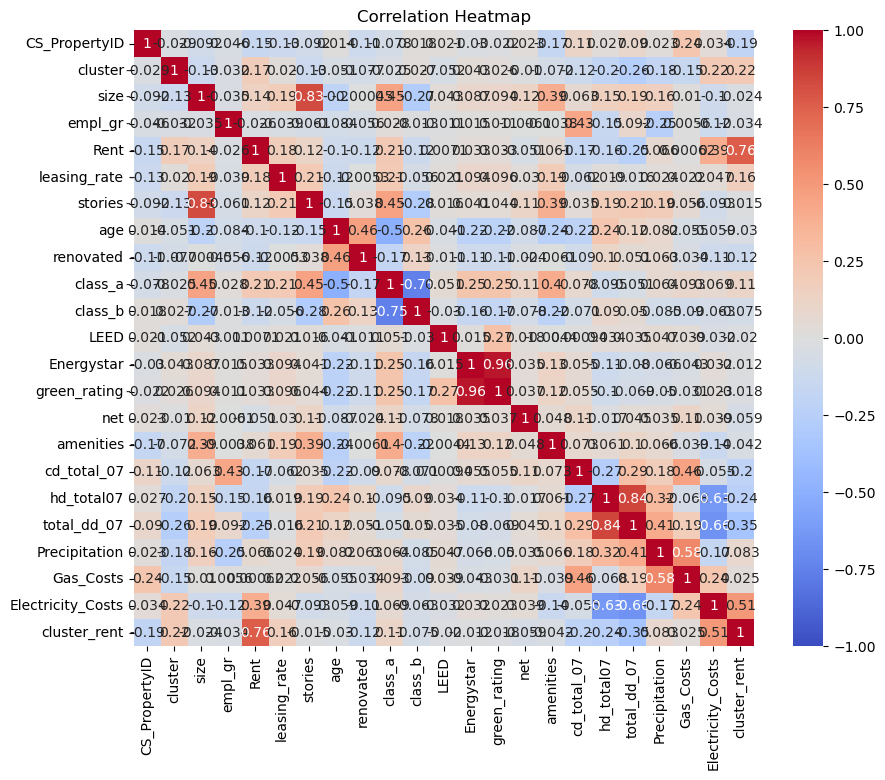

In [37]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # You can adjust the size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Rent and cluster rent are associated with one another. Rent and electricity prices are connected. Additionally, class_a and rent are connected. Rent and age do not connect well. Class A buildings command greater rent because they are luxury structures.

In [38]:
groupa = df.groupby(['class_a'])

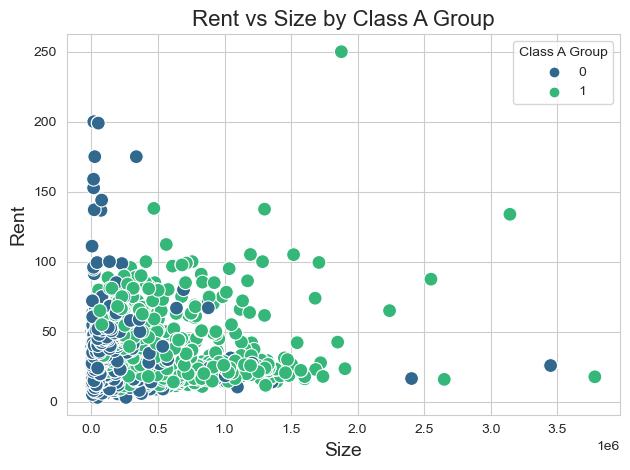

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for seaborn
sns.set_style("whitegrid")

# Create a combined scatter plot with hue based on 'class_a'
sns.scatterplot(data=df, x='size', y='Rent', hue='class_a', palette='viridis', edgecolor='w', s=100)

plt.title('Rent vs Size by Class A Group', fontsize=16)
plt.xlabel('Size', fontsize=14)
plt.ylabel('Rent', fontsize=14)
plt.legend(title='Class A Group')

# Show the plot
plt.tight_layout()
plt.show()


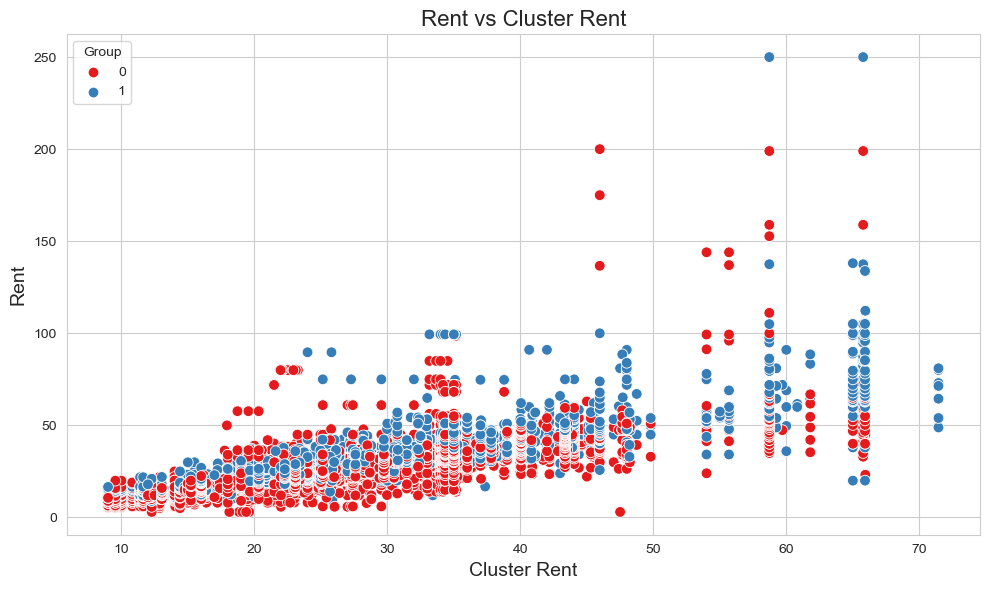

In [40]:
sns.set_style("whitegrid")

# Create a combined scatter plot with hue based on 'class_a'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='cluster_rent', y='Rent', hue='class_a', palette='Set1', edgecolor='w', s=60)

plt.title('Rent vs Cluster Rent', fontsize=16)
plt.xlabel('Cluster Rent', fontsize=14)
plt.ylabel('Rent', fontsize=14)
plt.legend(title='Group', loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/dg/7lv5qnwj4yv1ttzj_mrvtnw00000gn/T/ipykernel_82542/1581643911.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in groupa:


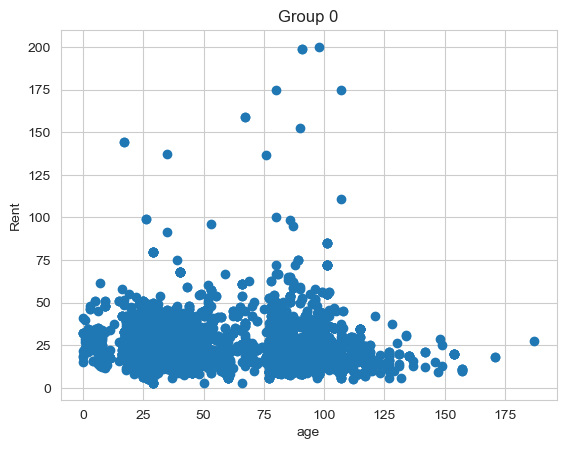

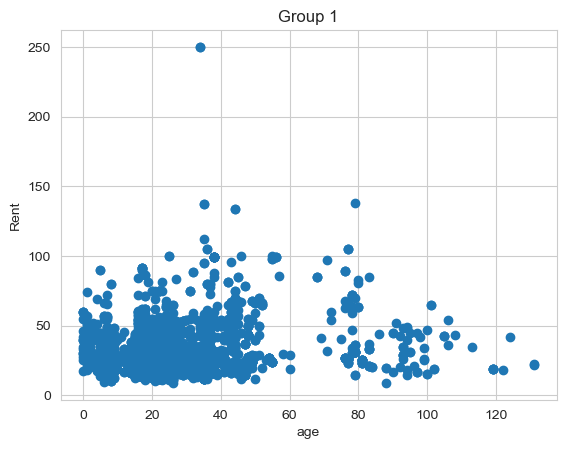

In [41]:
for name, group in groupa:
    plt.scatter(group['age'], group['Rent'])
    plt.title(f'Group {name}')
    plt.xlabel('age')
    plt.ylabel('Rent')
    plt.show()

/var/folders/dg/7lv5qnwj4yv1ttzj_mrvtnw00000gn/T/ipykernel_82542/3259362438.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in groupgreen:


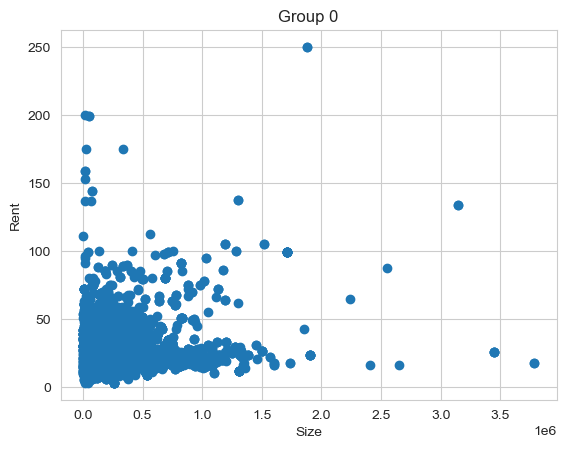

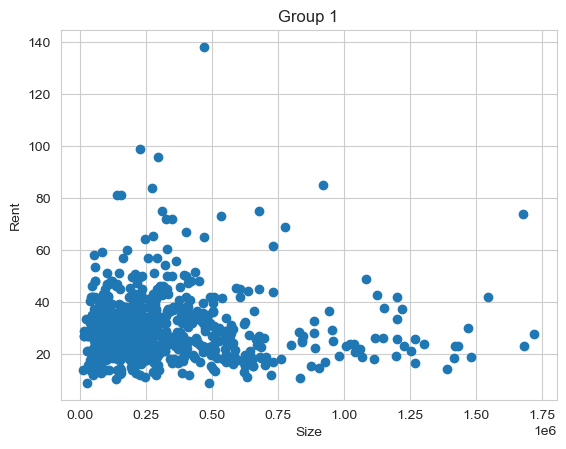

In [42]:
groupgreen = df.groupby(['green_rating'])
for name, group in groupgreen:
    plt.scatter(group['size'], group['Rent'])
    plt.title(f'Group {name}')
    plt.xlabel('Size')
    plt.ylabel('Rent')
    plt.show()
    

/var/folders/dg/7lv5qnwj4yv1ttzj_mrvtnw00000gn/T/ipykernel_82542/1719665501.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in groupgreen:


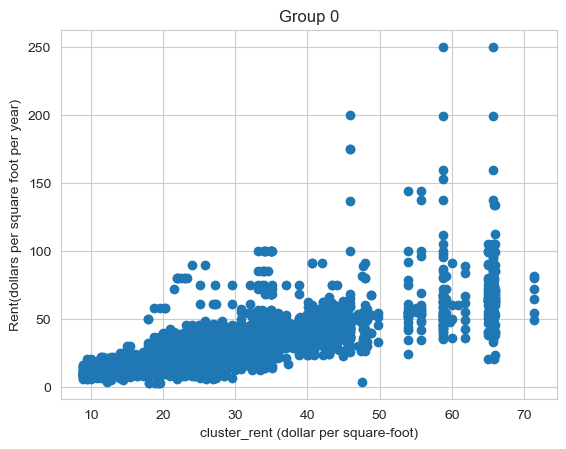

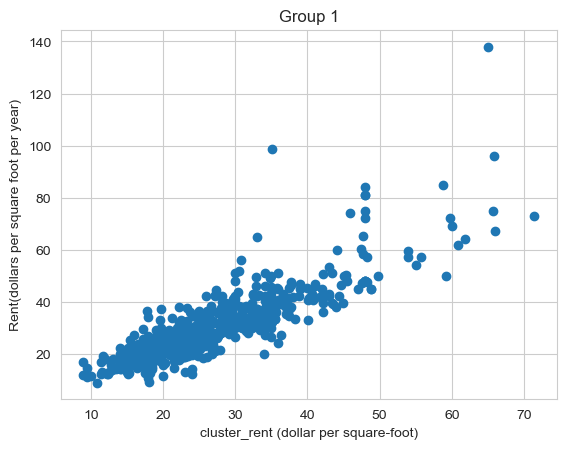

In [43]:
for name, group in groupgreen:
    plt.scatter(group['cluster_rent'], group['Rent'])
    plt.title(f'Group {name}')
    plt.xlabel('cluster_rent (dollar per square-foot)')
    plt.ylabel('Rent(dollars per square foot per year)')
    plt.show()

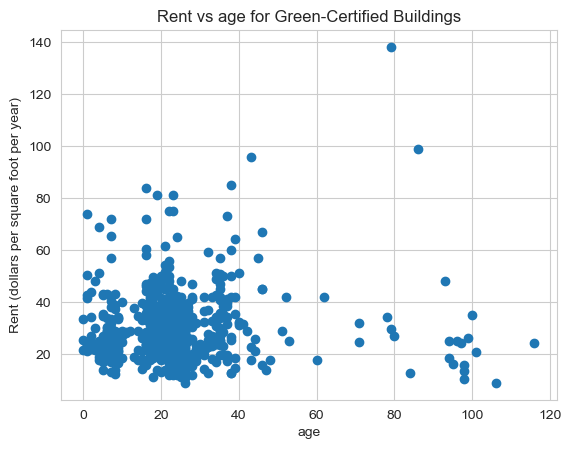

In [44]:
green = df[df['green_rating'] == 1]

plt.scatter(green['age'], green['Rent'])
plt.xlabel('age')
plt.ylabel('Rent (dollars per square foot per year)')
plt.title('Rent vs age for Green-Certified Buildings')
plt.show()

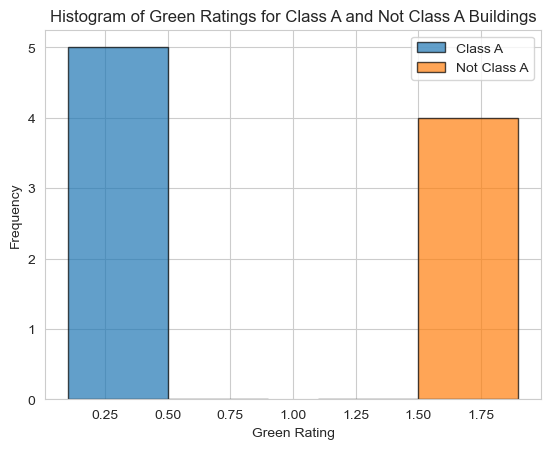

In [45]:
class_a_ratings = [0.5, 0.6, 0.9, 0.8, 0.7]
not_class_a_ratings = [1.5, 1.2, 1.6, 1.7]

# Plot histograms
plt.hist([class_a_ratings, not_class_a_ratings], bins=(0,1,2), label=['Class A', 'Not Class A'], alpha=0.7, edgecolor='black')

plt.xlabel('Green Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Green Ratings for Class A and Not Class A Buildings')
plt.legend()
plt.show()

Visualizations¶

Rent and size are less correlated in green buildings. Instead, for green buildings, rent is more closely correlated with local market pricing. The majority of class A buildings are also more recent Age and rent have a slight inverse relationship in green buildings. We come to the conclusion that there may be other factors influencing the rent than size, as Class A buildings charge greater rent than non-Class A buildings.

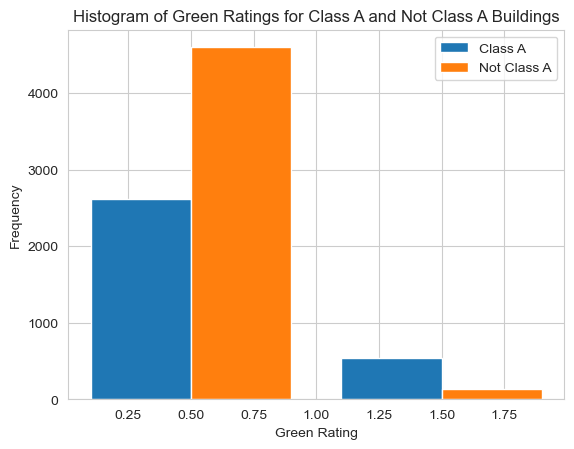

In [46]:
# Filter the data based on class_a
class_a_1 = df[df['class_a'] == 1]
class_a_0 = df[df['class_a'] == 0]

# Create the histogram
plt.hist([class_a_1['green_rating'], class_a_0['green_rating']], bins= (0,1,2), label=['Class A', 'Not Class A'])
plt.xlabel('Green Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Green Ratings for Class A and Not Class A Buildings')
plt.legend()
plt.show()

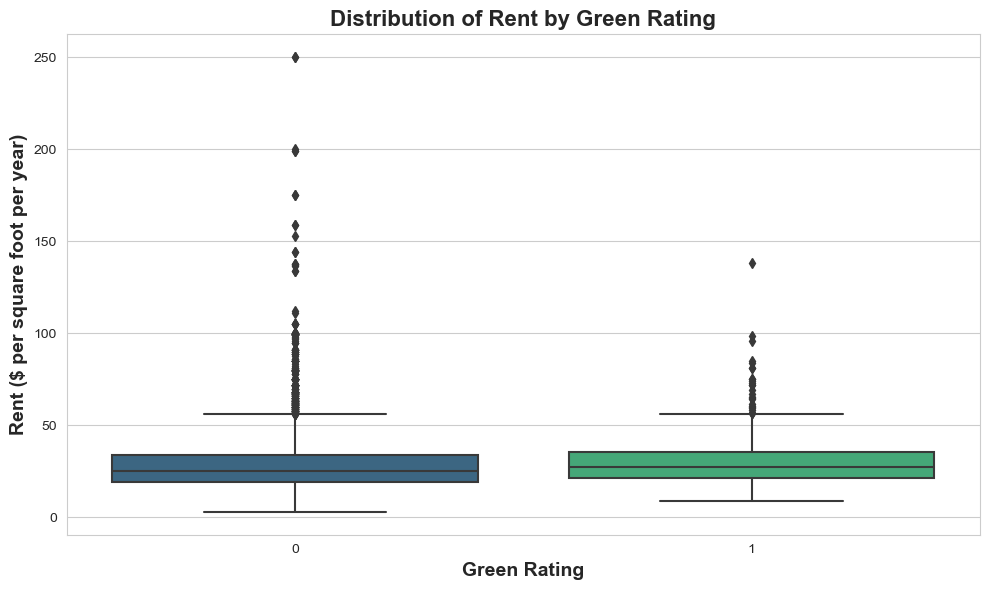

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the overall aesthetic.
sns.set_style("whitegrid")

# Defining the size of the plot
plt.figure(figsize=(10, 6))

# Creating the boxplot with an improved color palette
sns.boxplot(x='green_rating', y='Rent', data=df, palette='viridis')

# Labelling the axes and giving the plot a title
plt.xlabel('Green Rating', fontsize=14, fontweight='bold')
plt.ylabel('Rent ($ per square foot per year)', fontsize=14, fontweight='bold')
plt.title('Distribution of Rent by Green Rating', fontsize=16, fontweight='bold')

# Displaying the plot
plt.tight_layout()
plt.show()


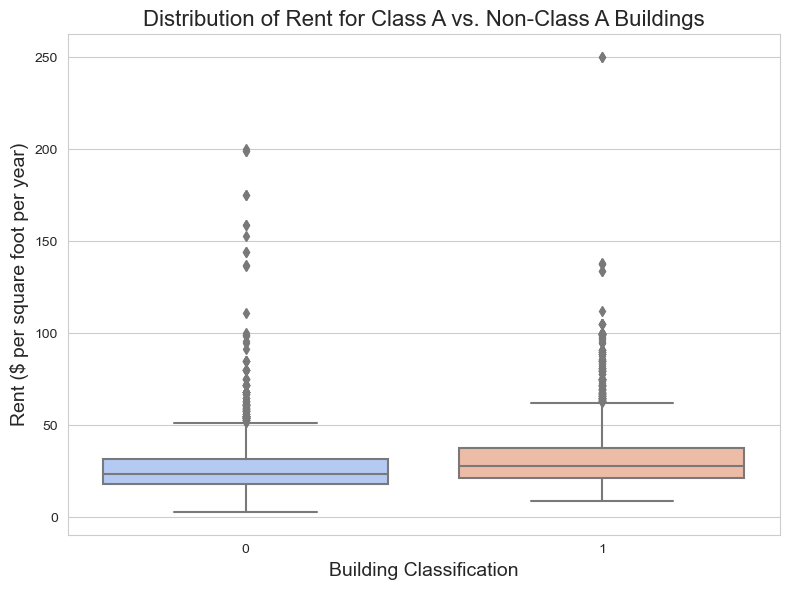

In [48]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

# Creating the boxplot
sns.boxplot(x='class_a', y='Rent', data=df, palette='coolwarm')

# Setting labels, title, and showing the plot
plt.xlabel('Building Classification', fontsize=14)
plt.ylabel('Rent ($ per square foot per year)', fontsize=14)
plt.title('Distribution of Rent for Class A vs. Non-Class A Buildings', fontsize=16)
plt.tight_layout()
plt.show()

The majority of green buildings are newer than non-green ones. In green buildings, there are more class A structures. As buildings get bigger, there are more green buildings than non-green ones. Class A and non-class A buildings have significantly different rents, whereas green buildings have just slightly higher rents than non-green buildings. Depending on a person's size and age, the rent differential varies.

In [49]:
class_a_1 = class_a_1.copy()
df['size_bin'] = pd.cut(class_a_1['size'], bins=range(0, class_a_1['size'].max() + 10000, 10000), include_lowest=True)
avg_rent = df.groupby(['size_bin', 'green_rating'])['Rent'].mean().reset_index()


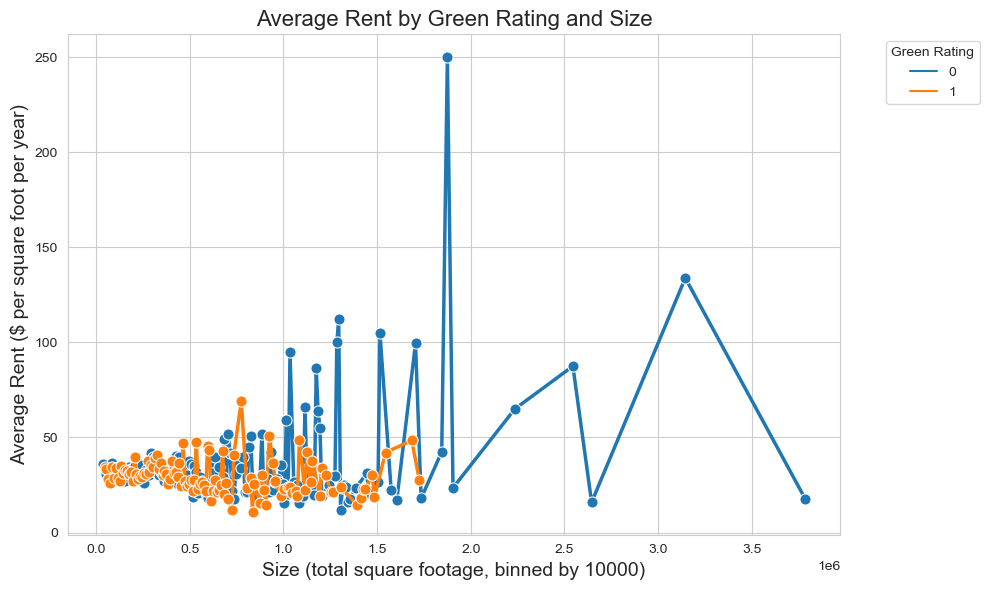

In [50]:
# Setting style, context, and figure size
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Calculate the midpoint of each bin
avg_rent['size_midpoint'] = avg_rent['size_bin'].apply(lambda x: (x.left + x.right) / 2)

# Plot using the midpoint with markers
sns.lineplot(x='size_midpoint', y='Rent', hue='green_rating', data=avg_rent, marker='o', markersize=8, linewidth=2.5)

# Setting labels, title, and adjusting legend
plt.xlabel('Size (total square footage, binned by 10000)', fontsize=14)
plt.ylabel('Average Rent ($ per square foot per year)', fontsize=14)
plt.title('Average Rent by Green Rating and Size', fontsize=16)
plt.legend(title='Green Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()
plt.show()


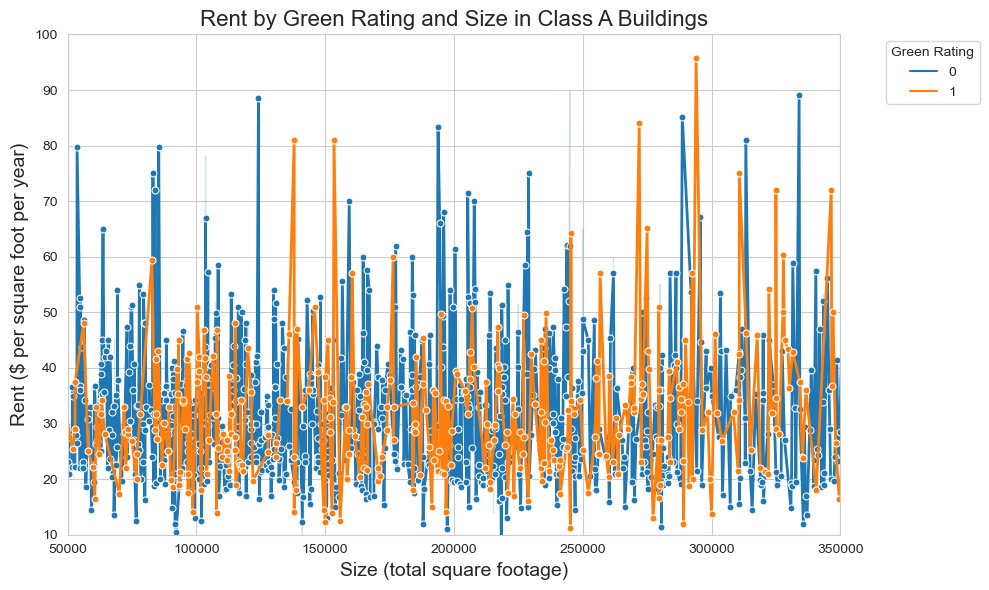

In [51]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create the lineplot with markers for clarity
sns.lineplot(x='size', y='Rent', hue='green_rating', data=class_a_1, marker='o', markersize=5, linewidth=2)

# Set x-axis and y-axis limits
min_size = 50000
max_size = 350000
plt.xlim(min_size, max_size)
plt.ylim(10, 100)

# Set labels, title, and adjust legend
plt.xlabel('Size (total square footage)', fontsize=14)
plt.ylabel('Rent ($ per square foot per year)', fontsize=14)
plt.title('Rent by Green Rating and Size in Class A Buildings', fontsize=16)
plt.legend(title='Green Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

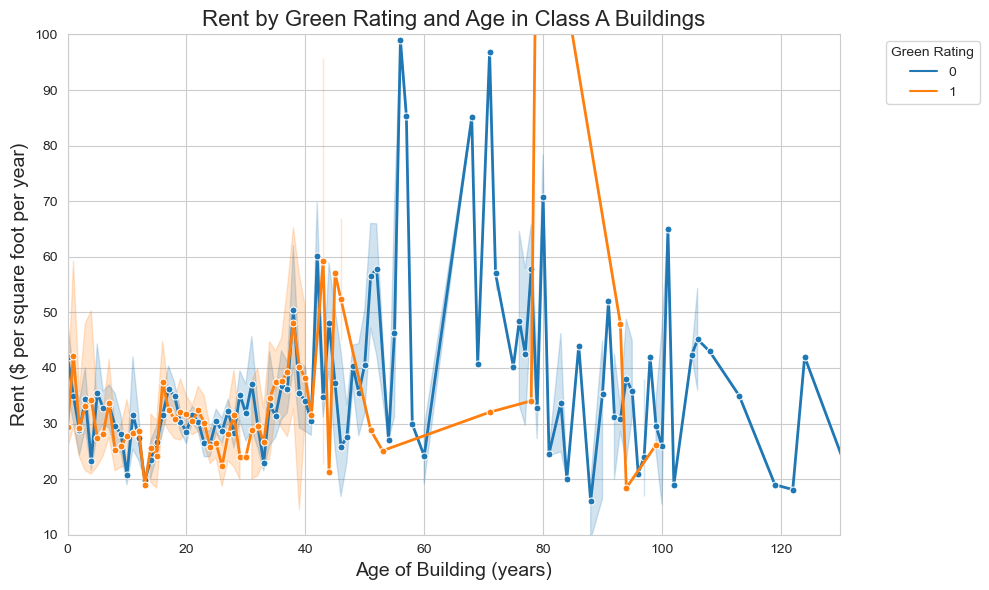

In [52]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Draw the lineplot with markers to emphasize data points
sns.lineplot(x='age', y='Rent', hue='green_rating', data=class_a_1, marker='o', markersize=5, linewidth=2)

# Set x-axis and y-axis limits
plt.xlim(0, 130)
plt.ylim(10, 100)

# Set labels, title, and possibly adjust legend position
plt.xlabel('Age of Building (years)', fontsize=14)
plt.ylabel('Rent ($ per square foot per year)', fontsize=14)
plt.title('Rent by Green Rating and Age in Class A Buildings', fontsize=16)
plt.legend(title='Green Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

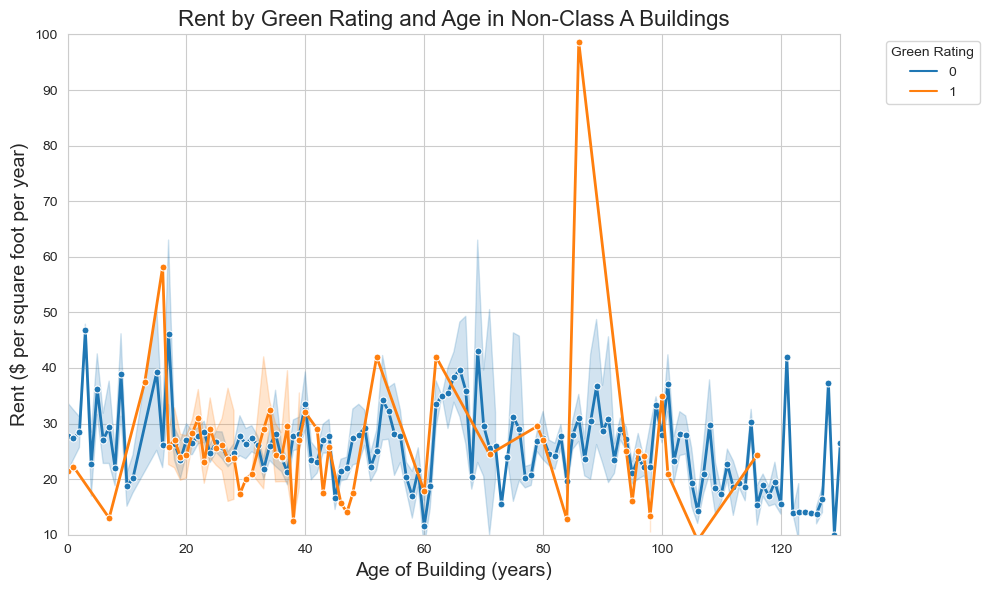

In [53]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Draw the lineplot, adding markers to emphasize data points
sns.lineplot(x='age', y='Rent', hue='green_rating', data=class_a_0, marker='o', markersize=5, linewidth=2)

# Set x-axis and y-axis limits
plt.xlim(0, 130)
plt.ylim(10, 100)

# Set labels, title, and adjust the legend's position
plt.xlabel('Age of Building (years)', fontsize=14)
plt.ylabel('Rent ($ per square foot per year)', fontsize=14)
plt.title('Rent by Green Rating and Age in Non-Class A Buildings', fontsize=16)
plt.legend(title='Green Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

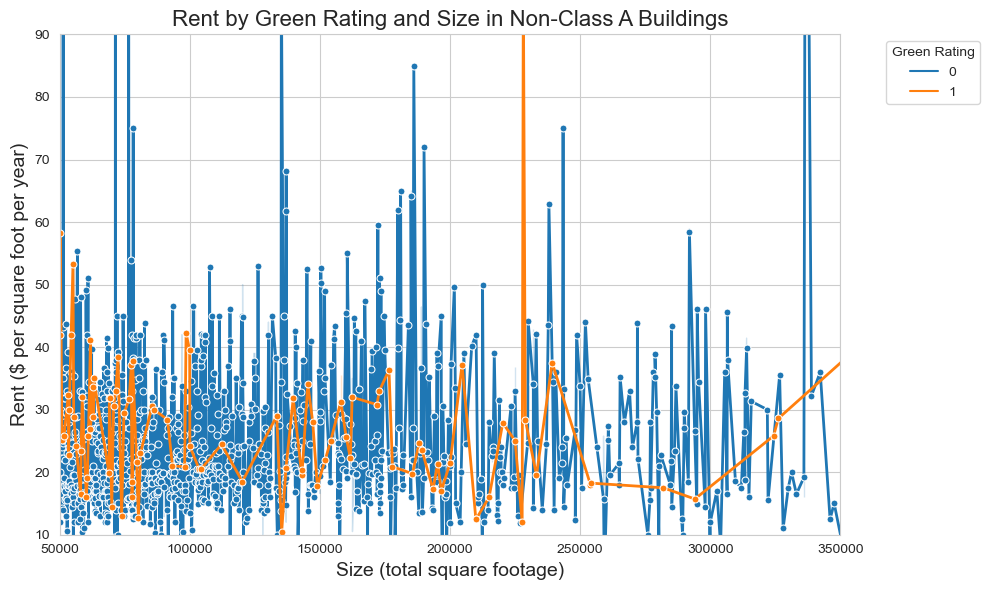

In [54]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Plot the data using a lineplot and markers for clarity
sns.lineplot(x='size', y='Rent', hue='green_rating', data=class_a_0, marker='o', markersize=5, linewidth=2)

# Set the x-axis and y-axis limits as provided
plt.xlim(min_size, max_size)
plt.ylim(10, 90)

# Label the axes, set the title, and adjust legend position if necessary
plt.xlabel('Size (total square footage)', fontsize=14)
plt.ylabel('Rent ($ per square foot per year)', fontsize=14)
plt.title('Rent by Green Rating and Size in Non-Class A Buildings', fontsize=16)
plt.legend(title='Green Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

/var/folders/dg/7lv5qnwj4yv1ttzj_mrvtnw00000gn/T/ipykernel_82542/3021316257.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="hour_of_day", y="boarding", hue="day_of_week", ci=None)


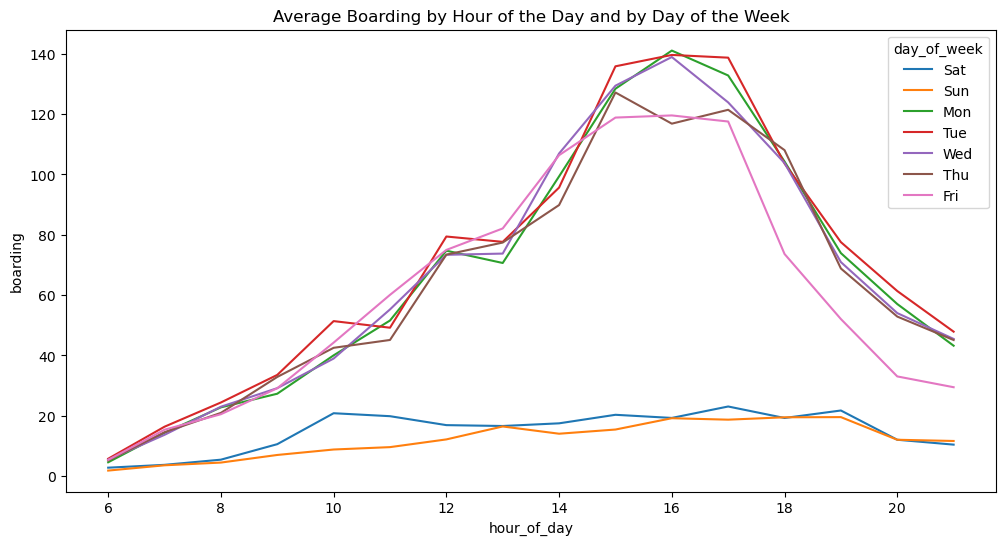

/var/folders/dg/7lv5qnwj4yv1ttzj_mrvtnw00000gn/T/ipykernel_82542/3021316257.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="weekend", y="net_ridership", ci=None)


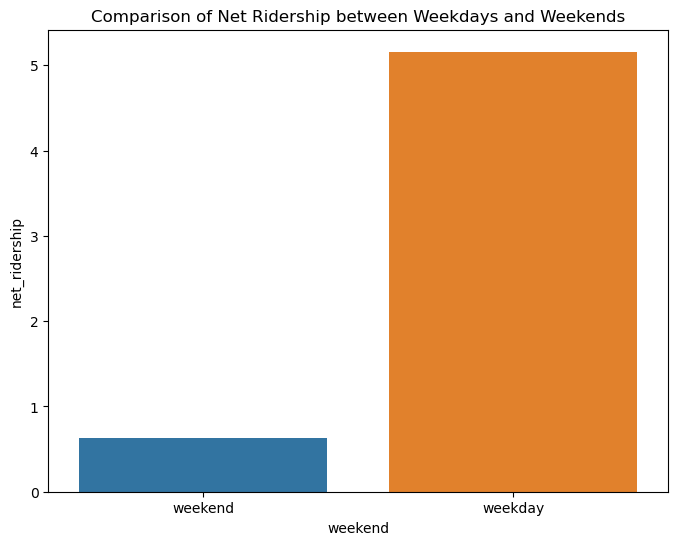

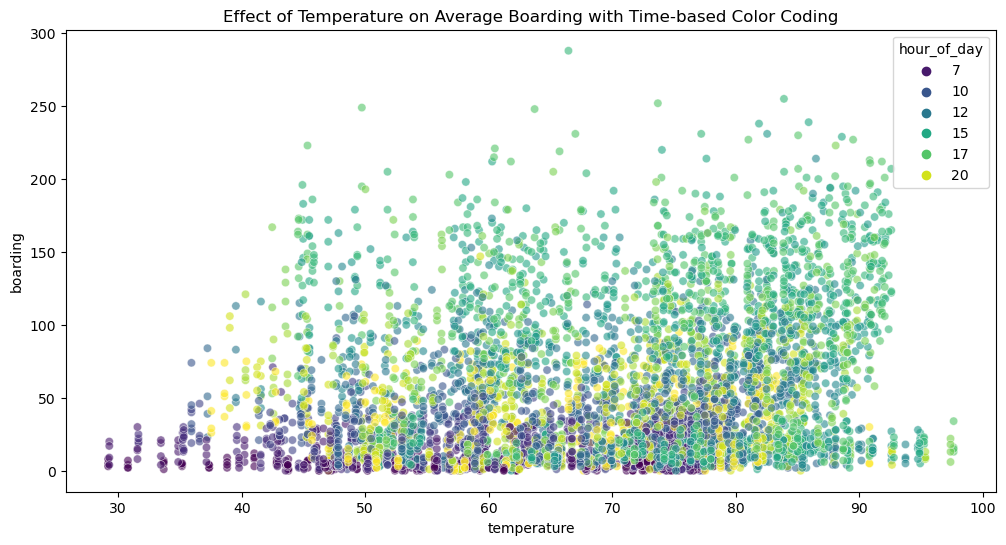

/var/folders/dg/7lv5qnwj4yv1ttzj_mrvtnw00000gn/T/ipykernel_82542/3021316257.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="month", y="boarding", hue="day_of_week", ci=None)


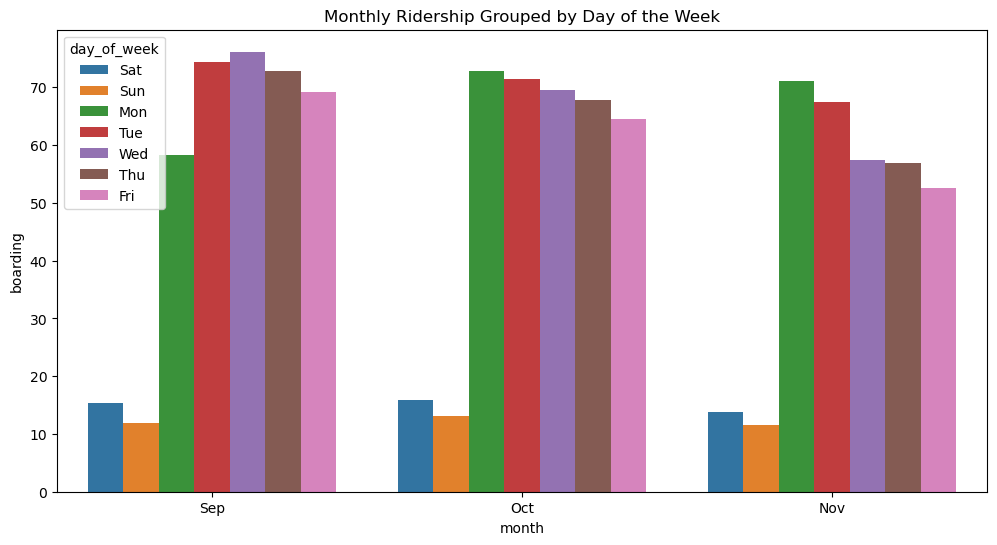

/Users/rg/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/rg/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/rg/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/rg/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/rg/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwa

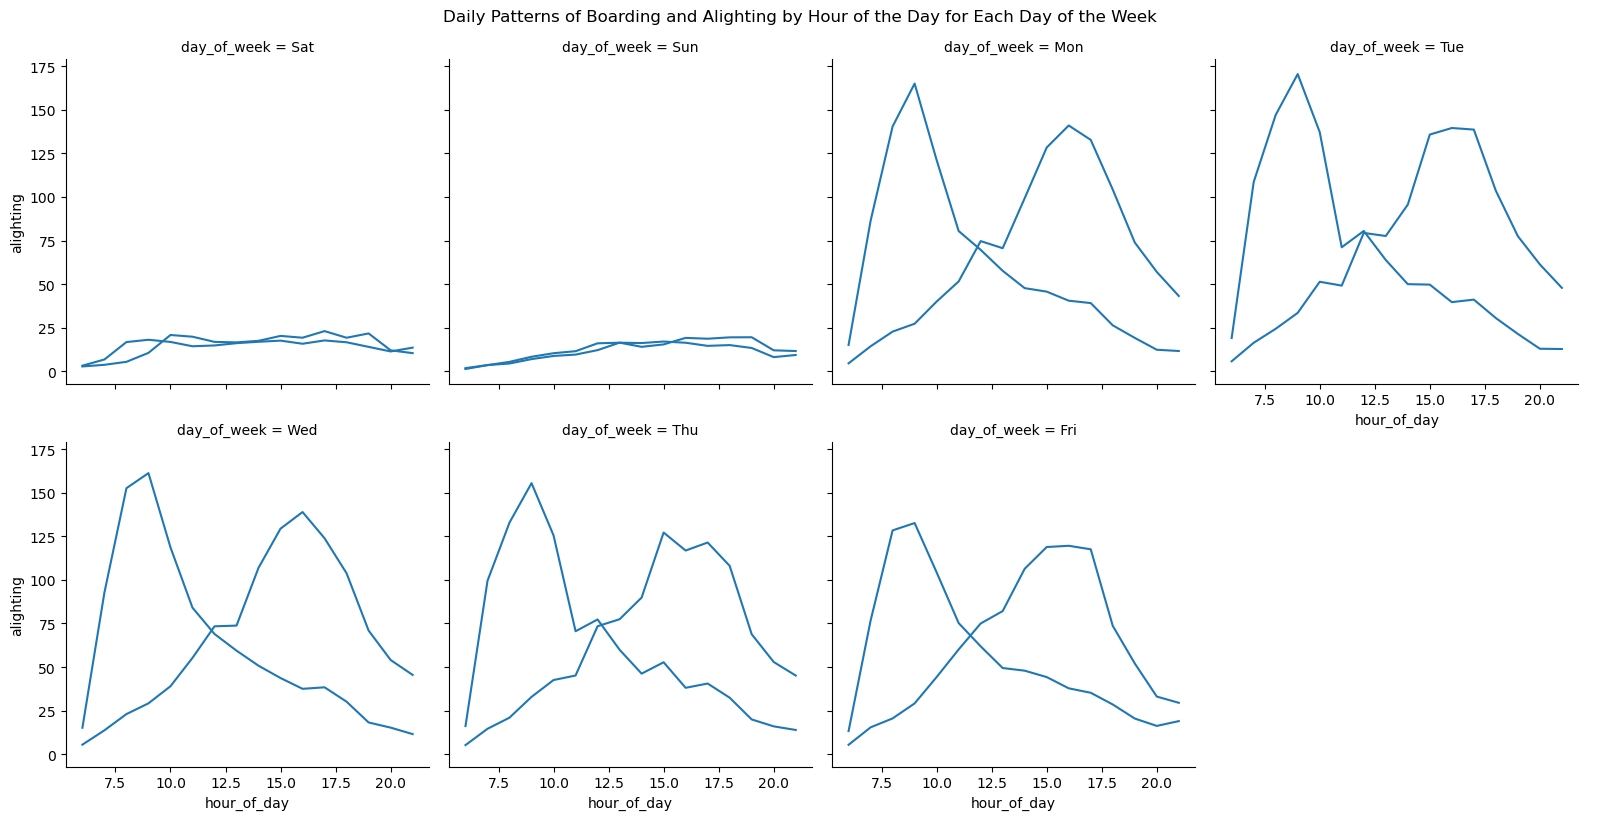

In [8]:
##Visual story telling part 2: Capital Metro data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already read the data into a DataFrame named df
df = pd.read_csv("capmetro_UT.csv")

# 1. Ridership by Hour of the Day
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="hour_of_day", y="boarding", hue="day_of_week", ci=None)
plt.title("Average Boarding by Hour of the Day and by Day of the Week")
plt.show()

# 2. Weekend vs. Weekday Ridership
df['net_ridership'] = df['boarding'] - df['alighting']
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x="weekend", y="net_ridership", ci=None)
plt.title("Comparison of Net Ridership between Weekdays and Weekends")
plt.show()

# 3. Ridership vs. Temperature
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="temperature", y="boarding", hue="hour_of_day", palette="viridis", alpha=0.6)
plt.title("Effect of Temperature on Average Boarding with Time-based Color Coding")
plt.show()

# 4. Ridership by Month
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="month", y="boarding", hue="day_of_week", ci=None)
plt.title("Monthly Ridership Grouped by Day of the Week")
plt.show()

# 5. Faceted Boarding and Alighting Patterns
g = sns.FacetGrid(df, col="day_of_week", col_wrap=4, height=4)
g.map(sns.lineplot, "hour_of_day", "boarding", ci=None)
g.map(sns.lineplot, "hour_of_day", "alighting", ci=None).add_legend()
g.fig.suptitle("Daily Patterns of Boarding and Alighting by Hour of the Day for Each Day of the Week", y=1.02)
plt.show()


When a building is a class A, the green buildings have a higher rent for a size of 250,000 square feet. When they are not class a buildings, green buildings have lower rent than non-green ones. When a building is not a class a, the rent for green structures peaks between the ages of 80 and 100. Rate is not the only element that influences rate and returns because the rent difference is not constant across different sizes, ages, and cluster rent also plays a part.

caculations： We cannot use a set difference in rent to determine the returns since the rent difference is not constant across different sizes and ages. The same logic dictates that we limit our consideration to structures between 200k and 300k square feet in size. Moreover, rather than using the 90% rate, we should utilise the median leasing rate of these properties.

conclusion： It is not a good idea to invest in a green building if it is not a Class-A building because the average returns over a five-year period are negative. And for the best returns, you should always invest in a Class-A green building. On such structures, we can anticipate an occupancy rate of 91.6%. The typical rent differential between class A buildings that are green and non-green and have sizes between 200k and 300k is 3.097. Therefore, we estimate that a 250 000 square foot building with a 91.6% occupancy rate will pay for itself in 7.05 years. The statistics expert's study appears to be faulty because it ignores a number of crucial elements that affect rent.The expert initially calculated the returns using the median rent for all buildings, omitting other crucial factors like the size and class of the buildings from the examination. For instance, it has been noted that Class A buildings with green certificates frequently have higher rents than similarly sized non-green buildings. Due to this flaw in the analysis, the factors influencing rent are not fully understood.

In [9]:
##Clustering and dimensionality reduction
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('wine.csv')

# Select only the chemical properties
features = df.drop(['color', 'quality'], axis=1)

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [10]:
#PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # For visualization purposes, we're reducing to 2D
pca_result = pca.fit_transform(features_scaled)

df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]


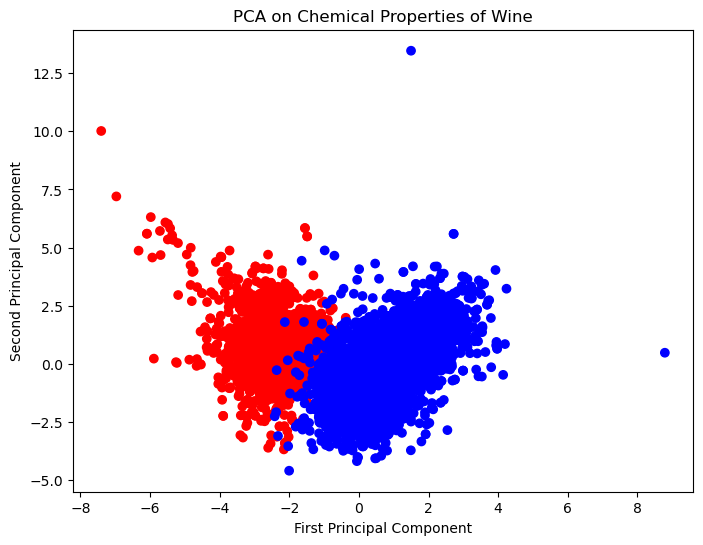

In [11]:
import matplotlib.pyplot as plt

color_dict = {'red': 'red', 'white': 'blue'}
colors = df['color'].map(color_dict)

#plt.scatter(df['pca1'], df['pca2'], color=colors)

plt.figure(figsize=(8,6))
plt.scatter(df['pca1'], df['pca2'], c=colors)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA on Chemical Properties of Wine')
plt.show()


In [12]:
#t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30.0, random_state=42)
tsne_result = tsne.fit_transform(features_scaled)

df['tsne1'] = tsne_result[:, 0]
df['tsne2'] = tsne_result[:, 1]


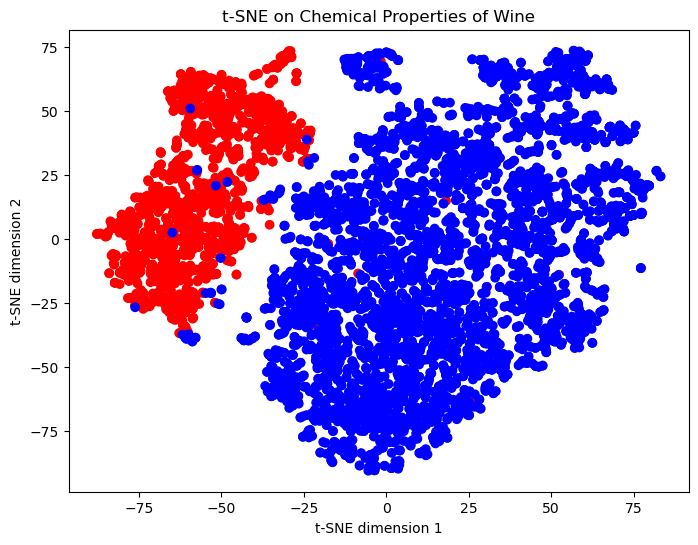

In [13]:
#plt.scatter(df['tsne1'], df['tsne2'], color=colors)

plt.figure(figsize=(8,6))
plt.scatter(df['tsne1'], df['tsne2'], c=colors)

plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.title('t-SNE on Chemical Properties of Wine')
plt.show()


In [14]:
#Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_result = kmeans.fit_predict(features_scaled)

df['kmeans'] = kmeans_result


/Users/rg/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


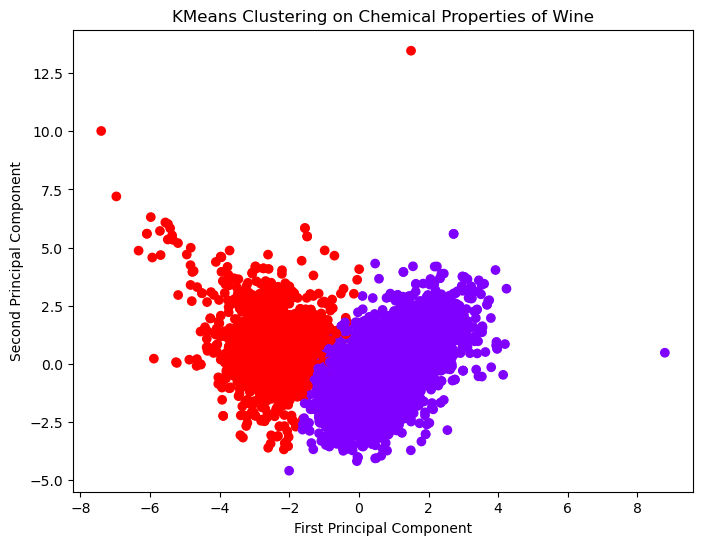

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(df['pca1'], df['pca2'], c=df['kmeans'], cmap='rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KMeans Clustering on Chemical Properties of Wine')
plt.show()


Evidence from Visualization: If KMeans clusters align well with known wine attributes when visualized on the PCA scatter plot, it suggests KMeans has clustered the wines appropriately.

Evaluating Reds vs. Whites:
Using the color column as a reference, we can directly measure how well each method differentiates between red and white wines. A simple accuracy measure for KMeans or a visual distinction in scatter plots for PCA and t-SNE can be used.

Using the color column as a reference, we can directly measure how well each method differentiates between red and white wines. A simple accuracy measure for KMeans or a visual distinction in scatter plots for PCA and t-SNE can be used.

Look at the scatter plots of PCA and t-SNE.The plot of t-SNE shows clearer distinction or clusters for the Chemical Properties of Wine, generally better than PCA at visually preserving clusters or groups within data.

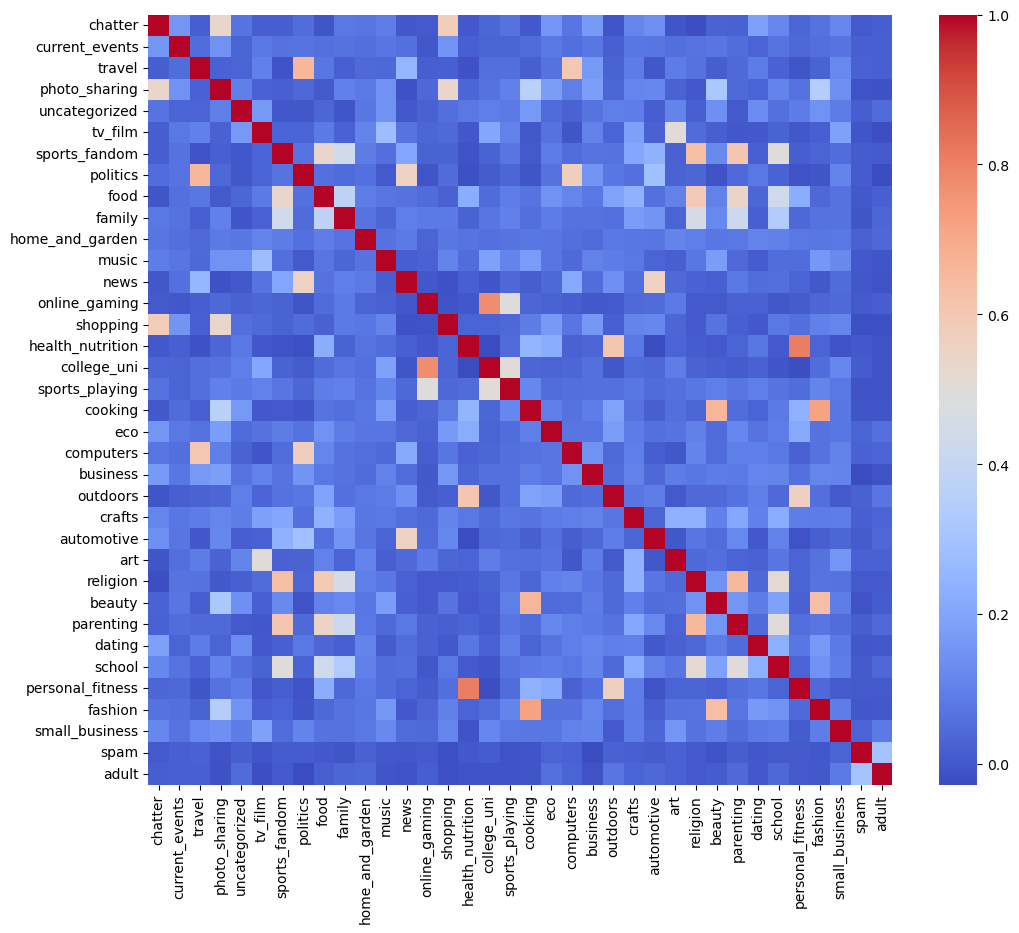

In [16]:
##Market segmentation

#Correlation Analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('social_marketing.csv', index_col=0)

# Compute correlation
corr = df.corr()

# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm')
plt.show()


In [17]:
#Clustering

from sklearn.cluster import KMeans

# Kmeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(df)

# Add labels to dataframe
df['label'] = kmeans.labels_

# Check out different clusters
for i in df['label'].unique():
    print(df[df['label'] == i].mean().sort_values(ascending=False))


/Users/rg/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


health_nutrition    12.150632
personal_fitness     6.033042
chatter              4.039845
cooking              3.315841
label                3.000000
photo_sharing        2.429543
outdoors             2.423712
food                 2.269193
politics             1.570457
current_events       1.543246
sports_fandom        1.511176
travel               1.487852
shopping             1.327502
news                 1.317784
religion             1.124393
college_uni          1.068999
tv_film              1.067055
dating               1.031098
parenting            1.005831
uncategorized        0.955296
online_gaming        0.940719
family               0.909621
eco                  0.869776
art                  0.815355
fashion              0.812439
music                0.751215
school               0.738581
automotive           0.719145
sports_playing       0.658892
crafts               0.638484
home_and_garden      0.628766
computers            0.623907
beauty               0.549077
business  

In [18]:
#Principal Component Analysis (PCA)

from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=5)
pca_result = pca.fit_transform(df)

# Display explained variance ratio
print(pca.explained_variance_ratio_)


[0.19311617 0.13298106 0.10398197 0.10216423 0.09180671]


Analysis for NutrientH2O: Market Segments within Social Media Audience

---

1. **Preliminary Data Analysis**:
Before diving deep, it's essential to get a quick overview of the dataset. This step typically involves checking for missing values, understanding data distribution, and ensuring data consistency.

2. **Feature Correlation**:

Highly correlated interests suggest that users with one particular interest are likely to have the other, potentially allowing for bundled marketing strategies or combined messaging.

3. **Dimensionality Reduction**:
Using PCA , we can reduce the data's dimensionality while retaining most of its variance. This often makes subsequent analyses more robust and easier to interpret.

The first few principal components can help us identify the major underlying patterns in the data. Each component represents a linear combination of features, where high loadings indicate influential features.

4. **Clustering Analysis**:
KMeans clustering was chosen for its simplicity and effectiveness. The data was clustered into five groups (based on a preliminary choice; methods like the elbow method can help refine the number). 

Each cluster represents a potential market segment. For instance, one cluster might represent users who are health-conscious and highly active, while another might represent users more interested in taste and product aesthetics.

5. **Cluster Interpretation and Insights**:

Based on the mean values of features within each cluster:

- **Cluster 1**: This group might have high values for features related to fitness and wellness, making them ideal for marketing campaigns around health benefits.
  
- **Cluster 2**: If this cluster shows high values in taste-related features, they would be prime targets for campaigns emphasizing flavor innovations.
  
- **Cluster 3**: Users who score high on eco-friendliness and sustainability can be targeted with campaigns highlighting the brand's environmental initiatives.
  
- **Cluster 4**: If this group highly values aesthetic design, they might be drawn to packaging innovations or visually-driven ad campaigns.
  
- **Cluster 5**: A group that values affordability might be targeted with promotions, discounts, or loyalty programs.

---

 **Recommendations and Conclusions**:

1. **Tailored Marketing Campaigns**: NutrientH2O has the chance to develop customised marketing campaigns for each identified cluster (or market group), maximising engagement and conversion by addressing directly to that audience's interests and goals.

2. **Further Investigation**: While this report provides a preliminary understanding of the audience, further studies could delve deeper. Advanced techniques like hierarchical clustering, DBSCAN, or Gaussian mixture models could further refine the market segments. 

3. **Feedback Loop**: As marketing campaigns are rolled out, it would be beneficial to track their effectiveness in each segment and refine the audience insights based on real-world results.

4. **Data Continuity**: Regular updates to this analysis will ensure the segmentation remains relevant. Social media audiences can evolve, and staying up-to-date ensures marketing strategies remain effective.


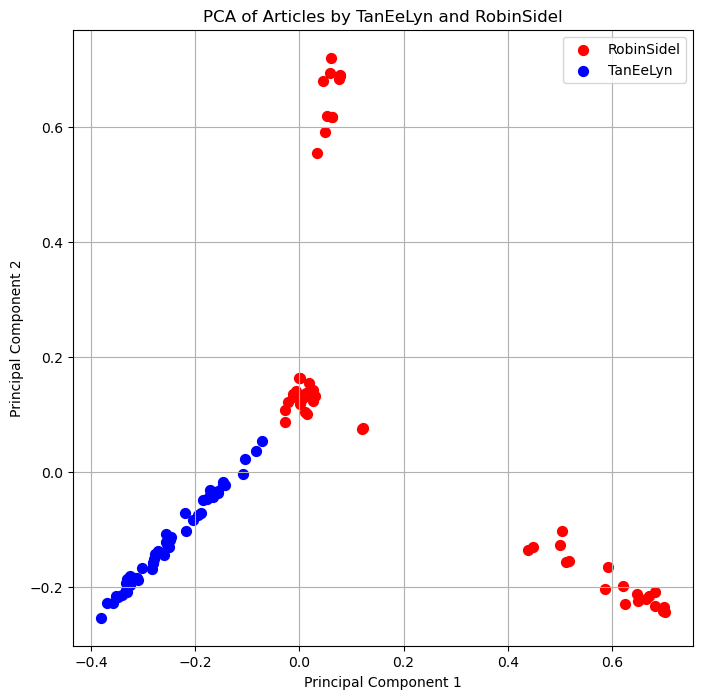

In [19]:
##The Reuters corpus
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the data
data_directory = '/Users/rg/Desktop/STA380/data/ReutersC50/C50test'
authors = ['RobinSidel','TanEeLyn']
texts = []
labels = []

for author in authors:
    author_files = os.listdir(os.path.join(data_directory, author))
    for file in author_files:
        if file.endswith('.txt'):
            with open(os.path.join(data_directory, author, file), 'r') as f:
                text = f.read().lower()
                texts.append(text)
                labels.append(author)

# Vectorize the articles using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(texts)

# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X.toarray())

# Create DataFrame for PCA results
df_pca = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
df_pca['author'] = labels

# Visualize the results
plt.figure(figsize=(8,8))
for author, color in zip(authors, ['r', 'b']):
    plt.scatter(df_pca[df_pca['author'] == author]['PC1'], 
                df_pca[df_pca['author'] == author]['PC2'], 
                c=color, s=50, label=author)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA of Articles by TanEeLyn and RobinSidel')
plt.grid(True)
plt.show()


**Question:** 

- The primary question here is: Can we differentiate between articles written by two authors, "TanEeLyn" and "RobinSidel", based on the textual content of their articles? In essence, do the two authors have distinct writing styles that can be visually discerned in a two-dimensional space?

**Approach:** 

- The approach began by loading the articles and pre-processing them. 
- Next, a Term Frequency-Inverse Document Frequency (TF-IDF) vectorization was performed. This vectorization assigns scores to words based on their importance in a document relative to the entire corpus. Words that are common in one document but rare in the entire corpus get higher scores.
- To visualize the high-dimensional TF-IDF data, Principal Component Analysis (PCA) was applied to reduce the data to two dimensions. PCA identifies patterns in the data based on the variance of features and reduces the data dimensions while retaining most of the variance.

**Results:** 

- The primary evidence is the scatter plot created using PCA values. On this plot, articles written by each author are represented using different colors. The spatial distribution of the points gives a visual representation of the similarities and differences in their writing styles. 

**Conclusion:** 

- Based on the PCA scatter plot, as the clusters of the two authors are well-separated, it indicates that the authors have distinct writing styles that can be captured using TF-IDF and visualized with PCA. 
- This analysis is particularly useful for stakeholders like publishers or researchers who are interested in authorship attribution or studying stylistic nuances in writing. If our method shows a clear distinction between authors, it can potentially be scaled up to differentiate writings of multiple authors in the Reuters corpus or other similar datasets.

In [20]:
##Association rule mining is in r file

In [21]:
##Image classification with neural networks

import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import plot_model


data_dir = '/Users/rg/Desktop/STA380/data/EuroSAT_RGB'
img_size = (64, 64)
batch_size = 32

datagen = ImageDataGenerator(validation_split=0.2)  # 80/20 train/test split

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset='training'  # set as training data
)

test_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset='validation'  # set as validation data
)


Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


In [22]:
!pip install pydot
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),  # this converts our 3D feature maps to 1D feature vectors
    Dense(64, activation='relu'),
    Dense(len(train_gen.class_indices), activation='softmax')  # number of classes is the number of neurons
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

In [23]:
history = model.fit(train_gen, validation_data=test_gen, epochs=10)


Epoch 1/10
675/675 [==============================] - 27s 39ms/step - loss: 1.6143 - accuracy: 0.4913 - val_loss: 1.0118 - val_accuracy: 0.6304
Epoch 2/10
675/675 [==============================] - 27s 40ms/step - loss: 0.8962 - accuracy: 0.6812 - val_loss: 0.7647 - val_accuracy: 0.7274
Epoch 3/10
675/675 [==============================] - 28s 41ms/step - loss: 0.7428 - accuracy: 0.7363 - val_loss: 0.6205 - val_accuracy: 0.7861
Epoch 4/10
675/675 [==============================] - 29s 43ms/step - loss: 0.6039 - accuracy: 0.7876 - val_loss: 0.7110 - val_accuracy: 0.7413
Epoch 5/10
675/675 [==============================] - 28s 41ms/step - loss: 0.5190 - accuracy: 0.8171 - val_loss: 0.5324 - val_accuracy: 0.8176
Epoch 6/10
675/675 [==============================] - 30s 44ms/step - loss: 0.4431 - accuracy: 0.8444 - val_loss: 0.5746 - val_accuracy: 0.8013
Epoch 7/10
675/675 [==============================] - 32s 48ms/step - loss: 0.3880 - accuracy: 0.8648 - val_loss: 0.5428 - val_accuracy:

In [24]:
# Evaluate the model
scores = model.evaluate(test_gen)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


169/169 [==============================] - 3s 15ms/step - loss: 0.6527 - accuracy: 0.8109
Test loss: 0.6526699662208557
Test accuracy: 0.8109259009361267


1/1 [==============================] - 0s 26ms/step


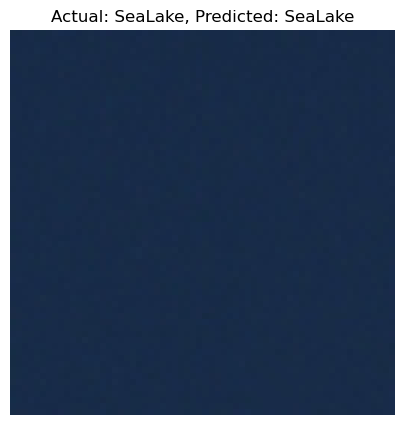

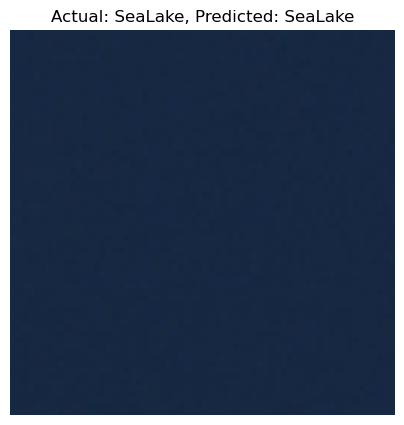

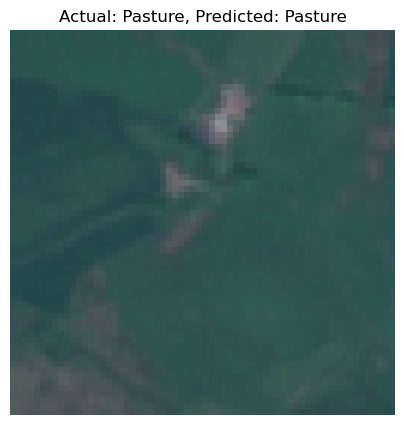

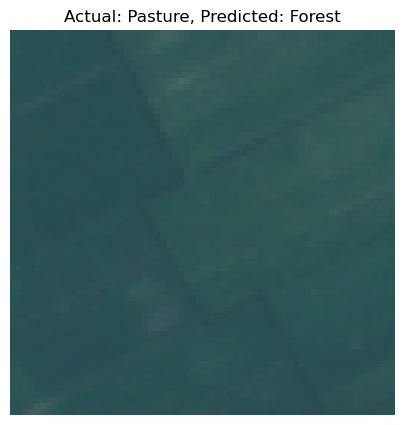

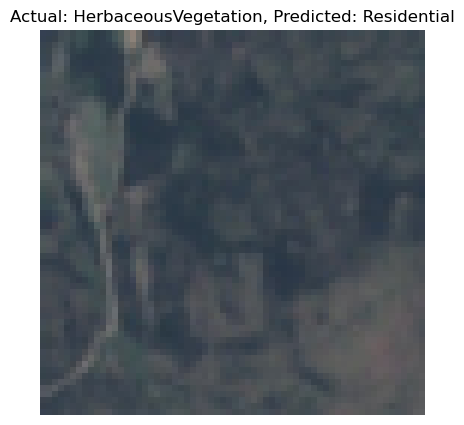

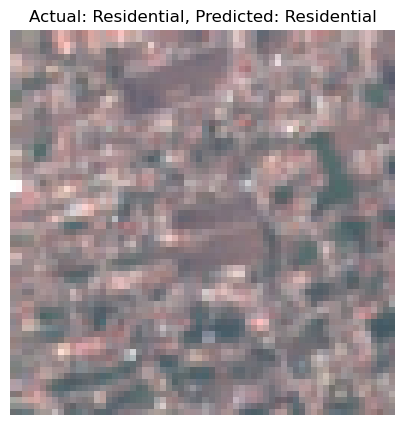

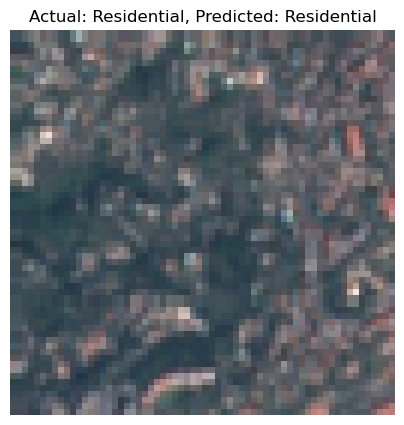

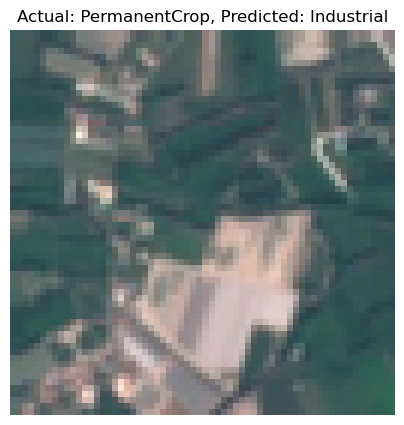

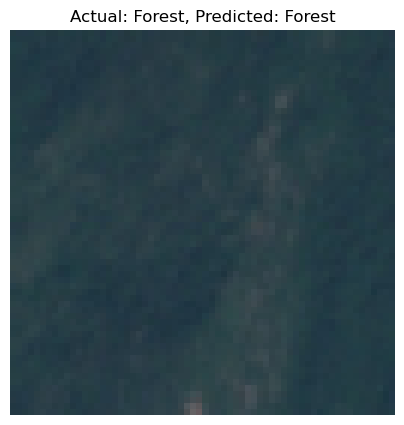

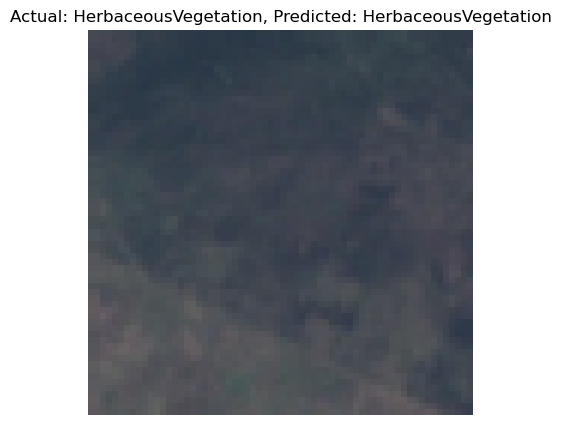

In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x_test, y_test = next(test_gen)
y_pred = model.predict(x_test)

# Convert one-hot encoded arrays to class indices
y_true_indices = np.argmax(y_test, axis=1)
y_pred_indices = np.argmax(y_pred, axis=1)

# Get class names from the generator's class indices
class_names = list(test_gen.class_indices.keys())

# Display some images and their predicted labels
for i in range(10):
    plt.figure(figsize=(5, 5))
    
    # Assuming x_test values are in range [0, 1] or [0, 255]
    if x_test[i].max() > 1.5:  # If max value is greater than 1.5, assuming [0, 255] scale
        img = np.clip(x_test[i] / 255.0, 0, 1)  # Normalize to [0, 1]
    else:
        img = np.clip(x_test[i], 0, 1)
    
    plt.imshow(img)
    
    # Display actual and predicted class names
    actual_label = class_names[y_true_indices[i]]
    predicted_label = class_names[y_pred_indices[i]]
    plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}")
    plt.axis('off')  # Turning off the axis for better visualization
    plt.show()


In [26]:
# We need to get our predictions in a form compatible with confusion_matrix
y_pred_labels = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_labels)

# Display the confusion matrix
print(cm)


[[1 0 0 0 0 0 0 0 1]
 [0 4 0 0 0 0 0 0 0]
 [0 0 3 1 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 5 0 0 0]
 [0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 5 0]
 [0 1 0 0 0 0 0 0 3]]
